<a href="https://colab.research.google.com/github/griffin9899/adk-samples/blob/main/notebooks/official/generative_ai/anthropic_claude_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with Claude Models
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/generative_ai/anthropic_claude_intro.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fvertex-ai-samples%2Fmain%2Fnotebooks%2Fofficial%2Fgenerative_ai%2Fanthropic_claude_intro.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">                                                                             
    <a href="https://console.cloud.google.com/vertex-ai/notebooks/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/vertex-ai-samples/main/notebooks/official/generative_ai/anthropic_claude_intro.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/generative_ai/anthropic_claude_intro.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  
</table>

## Overview

### Claude on Vertex AI

Anthropic Claude models on Vertex AI offer fully managed and serverless models are offered as managed APIs. To use a Claude model on Vertex AI, send a request directly to the Vertex AI API endpoint.

You can stream your Claude responses to reduce the end-user latency perception. A streamed response uses server-sent events (SSE) to incrementally stream the response.

### Available Anthropic Claude models

#### Claude Sonnet 4
Anthropic's mid-size model with superior intelligence for high-volume uses in coding, in-depth research, agents, & more.

#### Claude Opus 4
Anthropic’s most powerful model yet and the state-of-the-art coding model. It delivers sustained performance on long-running tasks that require focused effort and thousands of steps, significantly expanding what AI agents can solve. Claude Opus 4 is ideal for powering frontier agent products and features.

#### Claude 3.7 Sonnet
Industry-leading model for coding and powering AI agents—and the first Claude model to offer extended thinking.

#### Claude 3.5 Sonnet v2
The upgraded Claude 3.5 Sonnet is now state-of-the-art for a variety of tasks including real-world software engineering, enhanced agentic capabilities, and computer use.

#### Claude 3.5 Haiku
Claude 3.5 Haiku, Anthropic’s fastest and most cost-effective model, excels at use cases like code and test case generation, sub-agents, and user-facing chatbots.

#### Claude 3.5 Sonnet
Anthropic's most powerful AI model. Claude 3.5 Sonnet outperforms competitor models and Claude 3 Opus at higher speeds and lower cost.

#### Claude 3 Opus (Deprecated)
Claude 3 Opus is Anthropic's second-most intelligent AI model, with top-level performance on highly complex tasks.

#### Claude 3 Haiku
Anthropic Claude 3 Haiku is Anthropic's fastest, most compact vision and text model for near-instant responses to simple queries, meant for seamless AI experiences mimicking human interactions.

#### Claude 3 Sonnet (Deprecated)
Anthropic Claude 3 Sonnet is engineered to be dependable for scaled AI deployments across a variety of use cases.

All Claude models can process images and return text outputs, and feature a 200K context window.

## Objective

This notebook shows how to use **Vertex AI API** and **Anthropic’s Vertex SDK for Python** to call the Claude models on Vertex AI API.

For more information and list of supported regions, see the [Use Claude](https://cloud.google.com/vertex-ai/generative-ai/docs/partner-models/use-claude) documentation.


## Vertex AI API

## Get Started


### Install required packages


In [2]:
%pip install -U -q httpx

### Authenticate your notebook environment (Colab only)

Authenticate your environment on Google Colab.


In [3]:
import sys

if "google.colab" in sys.modules:

    from google.colab import auth

    auth.authenticate_user()

#### Select Claude model

In [4]:
MODEL = "claude-opus-4@20250514"  # @param ["claude-sonnet-4@20250514","claude-opus-4@20250514","claude-3-7-sonnet@20250219", "claude-3-5-sonnet-v2@20241022", "claude-3-5-haiku@20241022", "claude-3-5-sonnet@20240620", "claude-3-opus@20240229", "claude-3-haiku@20240307", "claude-3-sonnet@20240229" ]
if MODEL == "claude-sonnet-4@20250514":
    available_regions = ["us-east5", "europe-west4", "GLOBAL"]
elif MODEL == "claude-opus-4@20250514":
    available_regions = ["us-east5", "europe-west4", "GLOBAL"]
elif MODEL == "claude-3-7-sonnet@20250219":
    available_regions = ["us-east5", "europe-west1", "europe-west4", "GLOBAL"]
elif MODEL == "claude-3-5-sonnet-v2@20241022":
    available_regions = ["us-east5", "europe-west1", "GLOBAL"]
elif MODEL == "claude-3-5-haiku@20241022":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-5-sonnet@20240620":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-opus@20240229":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-haiku@20240307":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-sonnet@20240229":
    available_regions = ["us-east5"]

#### Select a location

In [5]:
import ipywidgets as widgets
from IPython.display import display

dropdown = widgets.Dropdown(
    options=available_regions,
    description="Select a location:",
    font_weight="bold",
    style={"description_width": "initial"},
)


def dropdown_eventhandler(change):
    global LOCATION
    if change["type"] == "change" and change["name"] == "value":
        LOCATION = change.new
        print("Selected:", change.new)


LOCATION = dropdown.value
dropdown.observe(dropdown_eventhandler, names="value")
display(dropdown)

Dropdown(description='Select a location:', options=('us-east5', 'europe-west4', 'GLOBAL'), style=DescriptionSt…

#### Set Google Cloud project and model information

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com). Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [6]:
PROJECT_ID = "GRIFFAVAI"  # @param {type:"string"}

if LOCATION == "GLOBAL":
    ENDPOINT = "https://aiplatform.googleapis.com"
else:
    ENDPOINT = f"https://{LOCATION}-aiplatform.googleapis.com"
ENDPOINT = f"https://{LOCATION}-aiplatform.googleapis.com"

if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    raise ValueError("Please set your PROJECT_ID")

#### Import required libraries

In [7]:
import base64
import json

import httpx
import requests
from IPython.display import Image

### Text generation

#### Unary call

Sends a POST request to the specified API endpoint to get a response from the model for a banana bread recipe using the provided payload.

In [8]:
PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [{"role": "user", "content": "Send me a recipe for banana bread."}],
    "max_tokens": 100,
    "stream": False,
}

request = json.dumps(PAYLOAD)
!curl -X POST -H "Authorization: Bearer $(gcloud auth print-access-token)" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:rawPredict -d '{request}'

{
  "error": {
    "code": 403,
    "message": "Permission denied on resource project GRIFFAVAI.",
    "status": "PERMISSION_DENIED",
    "details": [
      {
        "@type": "type.googleapis.com/google.rpc.ErrorInfo",
        "reason": "CONSUMER_INVALID",
        "domain": "googleapis.com",
        "metadata": {
          "containerInfo": "GRIFFAVAI",
          "service": "aiplatform.googleapis.com",
          "consumer": "projects/GRIFFAVAI"
        }
      },
      {
        "@type": "type.googleapis.com/google.rpc.LocalizedMessage",
        "locale": "en-US",
        "message": "Permission denied on resource project GRIFFAVAI."
      },
      {
        "@type": "type.googleapis.com/google.rpc.Help",
        "links": [
          {
            "description": "Google developers console",
            "url": "https://console.developers.google.com"
          }
        ]
      }
    ]
  }
}


#### Streaming call

Sends a POST request to the specified API endpoint to stream a response from the model for a banana bread recipe using the provided payload.

In [9]:
PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [{"role": "user", "content": "Send me a recipe for banana bread."}],
    "max_tokens": 100,
    "stream": True,
}

request = json.dumps(PAYLOAD)
!curl -X POST -H "Authorization: Bearer $(gcloud auth print-access-token)" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:streamRawPredict -d '{request}'

[{
  "error": {
    "code": 403,
    "message": "Permission denied on resource project GRIFFAVAI.",
    "status": "PERMISSION_DENIED",
    "details": [
      {
        "@type": "type.googleapis.com/google.rpc.ErrorInfo",
        "reason": "CONSUMER_INVALID",
        "domain": "googleapis.com",
        "metadata": {
          "consumer": "projects/GRIFFAVAI",
          "service": "aiplatform.googleapis.com",
          "containerInfo": "GRIFFAVAI"
        }
      },
      {
        "@type": "type.googleapis.com/google.rpc.LocalizedMessage",
        "locale": "en-US",
        "message": "Permission denied on resource project GRIFFAVAI."
      },
      {
        "@type": "type.googleapis.com/google.rpc.Help",
        "links": [
          {
            "description": "Google developers console",
            "url": "https://console.developers.google.com"
          }
        ]
      }
    ]
  }
}
]

### Vision

#### Encode And Preview Image

We fetch sample images from Wikipedia using the httpx library, but you can use whatever image sources work for you.

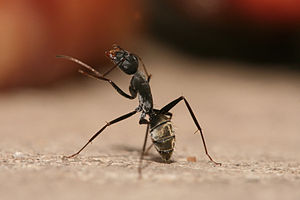

In [10]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Camponotus_flavomarginatus_ant.jpg/300px-Camponotus_flavomarginatus_ant.jpg"
image_b64 = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

response = requests.get(image_url)
image = Image(response.content, width=300, height=200)

image

#### Unary call

Sends a POST request to the specified API endpoint to get a response from the model analyzing the content of an image, provided as base64-encoded data, along with the text prompt.

In [11]:
PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": image_b64,
                    },
                },
                {"type": "text", "text": "What is in this image?"},
            ],
        }
    ],
    "max_tokens": 100,
    "stream": False,
}

request = json.dumps(PAYLOAD)
!curl -X POST -H "Authorization: Bearer $(gcloud auth print-access-token)" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:rawPredict -d '{request}'

{
  "error": {
    "code": 403,
    "message": "Permission denied on resource project GRIFFAVAI.",
    "status": "PERMISSION_DENIED",
    "details": [
      {
        "@type": "type.googleapis.com/google.rpc.ErrorInfo",
        "reason": "CONSUMER_INVALID",
        "domain": "googleapis.com",
        "metadata": {
          "consumer": "projects/GRIFFAVAI",
          "containerInfo": "GRIFFAVAI",
          "service": "aiplatform.googleapis.com"
        }
      },
      {
        "@type": "type.googleapis.com/google.rpc.LocalizedMessage",
        "locale": "en-US",
        "message": "Permission denied on resource project GRIFFAVAI."
      },
      {
        "@type": "type.googleapis.com/google.rpc.Help",
        "links": [
          {
            "description": "Google developers console",
            "url": "https://console.developers.google.com"
          }
        ]
      }
    ]
  }
}


#### Streaming call

Sends a POST request to the specified API endpoint to stream a response from the model analyzing the content of an image, provided as base64-encoded data, along with the text prompt.

In [12]:
PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": image_b64,
                    },
                },
                {"type": "text", "text": "What is in this image?"},
            ],
        }
    ],
    "max_tokens": 100,
    "stream": True,
}

request = json.dumps(PAYLOAD)
!curl -X POST -H "Authorization: Bearer $(gcloud auth print-access-token)" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:streamRawPredict -d '{request}'

[{
  "error": {
    "code": 403,
    "message": "Permission denied on resource project GRIFFAVAI.",
    "status": "PERMISSION_DENIED",
    "details": [
      {
        "@type": "type.googleapis.com/google.rpc.ErrorInfo",
        "reason": "CONSUMER_INVALID",
        "domain": "googleapis.com",
        "metadata": {
          "consumer": "projects/GRIFFAVAI",
          "containerInfo": "GRIFFAVAI",
          "service": "aiplatform.googleapis.com"
        }
      },
      {
        "@type": "type.googleapis.com/google.rpc.LocalizedMessage",
        "locale": "en-US",
        "message": "Permission denied on resource project GRIFFAVAI."
      },
      {
        "@type": "type.googleapis.com/google.rpc.Help",
        "links": [
          {
            "description": "Google developers console",
            "url": "https://console.developers.google.com"
          }
        ]
      }
    ]
  }
}
]

## Using Anthropic's Vertex SDK for *Python*

## Get Started


### Install Anthropic's Vertex SDK for Python and other required packages

In [13]:
! pip3 install -U -q 'anthropic[vertex]'
! pip3 install -U -q httpx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 6.3 MB/s eta 0:00:00


### Restart runtime (Colab only)

To use the newly installed packages, you must restart the runtime on Google Colab.

In [14]:
# Restart kernel after installs so that your environment can access the new packages
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

Authenticate your environment on Google Colab.


In [15]:
import sys

if "google.colab" in sys.modules:

    from google.colab import auth

    auth.authenticate_user()

#### Select Claude model

In [16]:
MODEL = "claude-sonnet-4@20250514"  # @param ["claude-sonnet-4@20250514","claude-opus-4@20250514","claude-3-7-sonnet@20250219", "claude-3-5-sonnet-v2@20241022", "claude-3-5-haiku@20241022", "claude-3-5-sonnet@20240620", "claude-3-opus@20240229", "claude-3-haiku@20240307", "claude-3-sonnet@20240229" ]
if MODEL == "claude-sonnet-4@20250514":
    available_regions = ["us-east5", "europe-west4", "GLOBAL"]
elif MODEL == "claude-opus-4@20250514":
    available_regions = ["us-east5", "europe-west4"]
elif MODEL == "claude-3-7-sonnet@20250219":
    available_regions = ["us-east5", "europe-west1", "europe-west4", "GLOBAL"]
elif MODEL == "claude-3-5-sonnet-v2@20241022":
    available_regions = ["us-east5", "europe-west1", "GLOBAL"]
elif MODEL == "claude-3-5-haiku@20241022":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-5-sonnet@20240620":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-opus@20240229":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-haiku@20240307":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-sonnet@20240229":
    available_regions = ["us-east5"]

#### Select a region

In [17]:
import ipywidgets as widgets
from IPython.display import display

dropdown = widgets.Dropdown(
    options=available_regions,
    description="Select a location:",
    font_weight="bold",
    style={"description_width": "initial"},
)


def dropdown_eventhandler(change):
    global LOCATION
    if change["type"] == "change" and change["name"] == "value":
        LOCATION = change.new
        print("Selected:", change.new)


LOCATION = dropdown.value
dropdown.observe(dropdown_eventhandler, names="value")
display(dropdown)

Dropdown(description='Select a location:', options=('us-east5', 'europe-west4', 'GLOBAL'), style=DescriptionSt…

#### Set Google Cloud project and model information

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com). Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [1]:
PROJECT_ID = "GRIFFAVAI"  # @param {type:"string"}
ENDPOINT = f"https://{LOCATION}-aiplatform.googleapis.com"

if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    raise ValueError("Please set your PROJECT_ID")

NameError: name 'LOCATION' is not defined

#### Import required libraries

In [ ]:
import base64

import httpx
import requests
from IPython.display import Image

### Text generation

#### Unary call

Initializes a client for Anthropic's Vertex AI, sends a request to generate the content, and prints the response in a formatted JSON

In [ ]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)
message = client.messages.create(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Send me a recipe for banana bread.",
        }
    ],
    model=MODEL,
)
print(message.model_dump_json(indent=2))

#### Streaming call

Initializes a client for Anthropic's Vertex AI, sends a streaming request to generate the content, and continuously prints the received text as it is streamed.

In [ ]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)

with client.messages.stream(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Send me a recipe for banana bread.",
        }
    ],
    model=MODEL,
) as stream:
    for text in stream.text_stream:
        print(text, end="", flush=True)

### Vision

#### Encode And Preview Image

We fetch sample images from Wikipedia using the httpx library, but you can use whatever image sources work for you.

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Camponotus_flavomarginatus_ant.jpg/300px-Camponotus_flavomarginatus_ant.jpg"
image_media_type = "image/jpeg"
image_b64 = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

response = requests.get(image_url)
image = Image(response.content, width=300, height=200)

image

#### Unary call

Initializes a client for Anthropic's Vertex AI, sends a request to describe an image (provided as base64-encoded data) along with a text prompt, and prints the response in a formatted JSON.

In [ ]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)

message = client.messages.create(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_b64,
                    },
                },
                {"type": "text", "text": "Describe this image."},
            ],
        }
    ],
    model=MODEL,
)
print(message.model_dump_json(indent=2))

#### Streaming call

Initializes a client for Anthropic's Vertex AI, sends a streaming request to describe an image (provided as base64-encoded data) along with a text prompt, and continuously prints the received text as it is streamed.

In [ ]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)

with client.messages.stream(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_b64,
                    },
                },
                {"type": "text", "text": "Describe this image."},
            ],
        }
    ],
    model=MODEL,
) as stream:
    for text in stream.text_stream:
        print(text, end="", flush=True)